In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data/Titanic
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data/Titanic
gender_submission.csv  test.csv  train.csv


In [184]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
pd.options.display.max_columns = None #kolon ve satır gösterim limitlerini sıfırlamak
pd.options.display.max_rows = None  #kolon ve satır gösterim limitlerini sıfırlamak
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

In [185]:
original_data = pd.read_csv("train.csv")
data=original_data.copy()
original_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [186]:
X=data[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
X.head()
Y=data['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [187]:
X=pd.get_dummies(X,prefix_sep='_',drop_first=True)
X.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,7.250,1,0,1
1,1,1,0,71.283,0,0,0
2,3,0,0,7.925,0,0,1
3,1,1,0,53.100,0,0,1
4,3,0,0,8.050,1,0,1


In [188]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Sex_male    891 non-null    uint8  
 5   Embarked_Q  891 non-null    uint8  
 6   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 30.6 KB


In [189]:
#X['Age'].unique()

In [190]:
#X = X[~np.isnan(X['Age'])]

In [191]:
#X['Age'].unique()

In [192]:
X.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,7.250,1,0,1
1,1,1,0,71.283,0,0,0
2,3,0,0,7.925,0,0,1
3,1,1,0,53.100,0,0,1
4,3,0,0,8.050,1,0,1


In [193]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Sex_male    891 non-null    uint8  
 5   Embarked_Q  891 non-null    uint8  
 6   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 30.6 KB


In [194]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [195]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, Y_eğitim, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

In [196]:
log_reg.fit(X_eğitim, Y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
egitim_dogruluk = log_reg.score(X_eğitim, Y_eğitim)
test_dogruluk = log_reg.score(X_test, Y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.79
Modelin test verisindeki doğruluğu   : 0.80


In [198]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, Y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, Y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, Y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.79
Modelin test verisindeki doğruluğu   : 0.80


In [199]:
x_mahmut=[[3,1,0,7.250,1,0,1]]

In [200]:
x_ahmet=[[1,	1,	0,	71.283,	0,	0,	0]]

In [201]:
log_reg_mnm.predict(x_ahmet)

array([1])

In [202]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,Y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, Y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, Y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri) 

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.678,0.693
1,0.010,0.708,0.743
2,0.100,0.795,0.793
3,1.000,0.795,0.804
4,10.000,0.795,0.804
5,100.000,0.795,0.804
6,1000.000,0.795,0.804


In [203]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000


In [204]:
X=data[['Pclass','Fare']]
Y=data['Survived']

In [205]:
X_eğitim, X_test, Y_eğitim, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

In [206]:
log_reg.fit(X_eğitim, Y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
egitim_dogruluk = log_reg.score(X_eğitim, Y_eğitim)
test_dogruluk = log_reg.score(X_test, Y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.68
Modelin test verisindeki doğruluğu   : 0.69


In [208]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, Y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, Y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, Y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.68
Modelin test verisindeki doğruluğu   : 0.69


In [209]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

In [216]:
X=data[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
X.head()
Y=data['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [217]:
X=pd.get_dummies(X,prefix_sep='_',drop_first=True)
X.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,7.250,1,0,1
1,1,1,0,71.283,0,0,0
2,3,0,0,7.925,0,0,1
3,1,1,0,53.100,0,0,1
4,3,0,0,8.050,1,0,1


In [212]:
# Specify the target classes
classes = ["Survived", "Dead"]

In [219]:
# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [214]:
# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

AttributeError: ignored

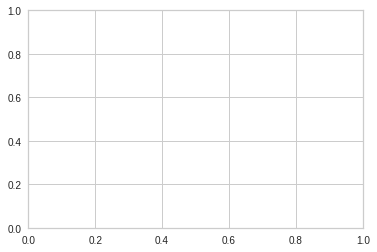

In [220]:
visualizer.fit(X_train, Y_train)        # Fit the visualizer and the model
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [223]:
X=data[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]
X.head()
Y=data['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [224]:
X=pd.get_dummies(X,prefix_sep='_',drop_first=True)
X.head()

,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,7.250,1,0,1
1,1,1,0,71.283,0,0,0
2,3,0,0,7.925,0,0,1
3,1,1,0,53.100,0,0,1
4,3,0,0,8.050,1,0,1


In [225]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, Y_eğitim, Y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

In [226]:
#Yeni düzene geçiyorum

yasam_tahmin_modeli = LogisticRegression()
yasam_tahmin_modeli.fit(X_eğitim, Y_eğitim)

tahmin_eğitim = yasam_tahmin_modeli.predict(X_eğitim)
tahmin_test = yasam_tahmin_modeli.predict(X_test)

In [227]:
tahmin_test_ihtimal = yasam_tahmin_modeli.predict_proba(X_test)[:,1]

In [228]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(Y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(Y_test, tahmin_test)

In [229]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[377  59]
 [ 87 189]]
Hata Matrisi (Test verileri)
------------------------------
[[101  12]
 [ 23  43]]


In [230]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 101
Doğru pozitif sayısı   : 43
Yanlış pozitif sayısı  : 12
Yanlış negatif sayısı  : 23


In [231]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  yasam_tahmin_modeli.score(X_test, Y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(Y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.8044692737430168
Hesaplanan doğruluk değeri      :  0.8044692737430168
accuracy_score() değeri         :  0.8044692737430168


In [232]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(Y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.7818181818181819
precision_score() değeri        :  0.7818181818181819


In [233]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(Y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.6515151515151515
recall_score() değeri        :  0.6515151515151515


In [234]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.8938053097345132


In [235]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(Y_test, tahmin_test)
duyarlılık_değeri = recall_score(Y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(Y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.7107438016528926
f1_score() değeri     :  0.7107438016528926


In [237]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(Y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(Y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(Y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(Y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(Y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       113
           1       0.78      0.65      0.71        66

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

f1_score() değeri        : 0.71
recall_score() değeri    : 0.65
precision_score() değeri : 0.78


Hassasiyet : [0.81451613 0.78181818]
Duyarlılık : [0.89380531 0.65151515]
F1 Skoru   : [0.85232068 0.7107438 ]


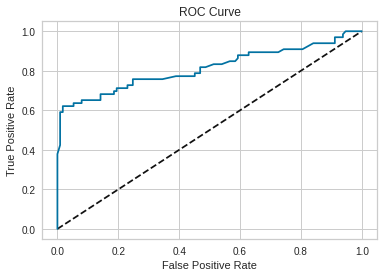

In [238]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(Y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [239]:
print('AUC Değeri : ', roc_auc_score(Y_test, tahmin_test_ihtimal))

AUC Değeri :  0.8125502815768302


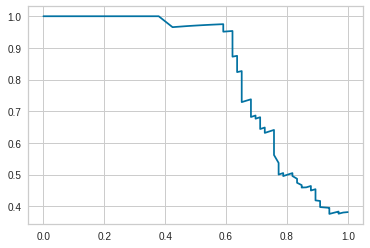

In [240]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(Y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [241]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(Y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(Y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.46642932358474937
Hata Oranı                  :  0.1955307262569832
